这篇博文的代码使用了猫狗分类的数据集，数据集下载地址在Kaggle上，可以移步 https://www.kaggle.com/c/dogs-vs-cats/data 下载原始数据集。

这个数据集包含 25 000 张猫狗图像（每个类别都有 12 500 张），大小为 543MB（压缩后）。下载数据并解压之后，你需要创建一个新数据集，其中包含三个子集：每个类别各 1000 个样本的训练集、每个类别各 500 个样本的验证集和每个类别各 500 个样本的测试集。

In [1]:
# 导入库
from keras import models
from keras import layers

In [2]:
# 定义一个序列模型
model = models.Sequential()

In [3]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers

In [6]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = r'E:\2--jupyter_notebook\python deeplearning\datasets\dog_cat_classify\cats_and_dogs_small\train'

In [10]:
validation_dir = r'E:\2--jupyter_notebook\python deeplearning\datasets\dog_cat_classify\cats_and_dogs_small\validation'

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
import time
def print_time():
    return time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))

In [13]:
print('current time', print_time())

current time 2019-03-20 20:06:26


In [14]:
print('start time', print_time())
history_first = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
print('end time', print_time())

start time 2019-03-20 20:06:48
Epoch 1/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6887 - acc: 0.5435 - val_loss: 0.6799 - val_acc: 0.5180
Epoch 2/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6628 - acc: 0.6150 - val_loss: 0.7849 - val_acc: 0.5210
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6102 - acc: 0.6720 - val_loss: 0.6227 - val_acc: 0.6430
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5670 - acc: 0.7020 - val_loss: 0.6269 - val_acc: 0.6360
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5387 - acc: 0.7320 - val_loss: 0.6506 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5116 - acc: 0.7440 - val_loss: 0.5985 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 6s 60ms/step - loss: 0.4929 - acc: 0.7575 - val_loss: 0.5861 - val_acc: 0.6900
Epoch 8/30
100/100 [================

In [15]:
import matplotlib.pyplot as plt

In [19]:
acc = history_first.history['acc']
val_acc = history_first.history['val_acc']
loss = history_first.history['loss']
val_loss =history_first.history['val_loss']
Epochs = range(1, len(loss) + 1)

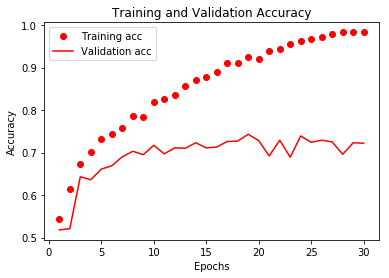

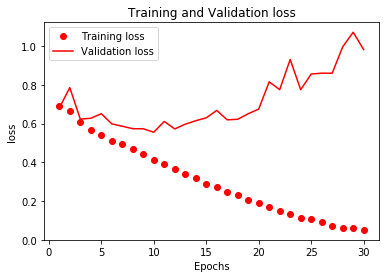

In [20]:
plt.plot(Epochs, acc, 'ro', label='Training acc')
plt.plot(Epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(Epochs, loss, 'ro', label='Training loss')
plt.plot(Epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [21]:
model.save('cats_and_dogs_small_1.h5')

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [24]:
# 数据增强
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
print('start time', print_time())
history_first = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
print('end time', print_time())

start time 2019-03-20 20:20:50
Epoch 1/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6924 - acc: 0.5262 - val_loss: 0.6753 - val_acc: 0.6041
Epoch 2/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6775 - acc: 0.5613 - val_loss: 0.6563 - val_acc: 0.6018
Epoch 3/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6620 - acc: 0.5972 - val_loss: 0.6746 - val_acc: 0.5660
Epoch 4/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6382 - acc: 0.6203 - val_loss: 0.6424 - val_acc: 0.6102
Epoch 5/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6215 - acc: 0.6447 - val_loss: 0.6301 - val_acc: 0.6377
Epoch 6/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6111 - acc: 0.6491 - val_loss: 0.5966 - val_acc: 0.6572
Epoch 7/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6041 - acc: 0.6706 - val_loss: 0.6302 - val_acc: 0.6491
Epoch 8/100
100/1

In [27]:
model.save('cats_and_dogs_small_2.h5')

In [28]:
acc = history_first.history['acc']
val_acc = history_first.history['val_acc']
loss = history_first.history['loss']
val_loss =history_first.history['val_loss']
Epochs = range(1, len(loss) + 1)

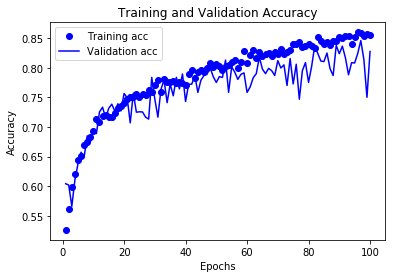

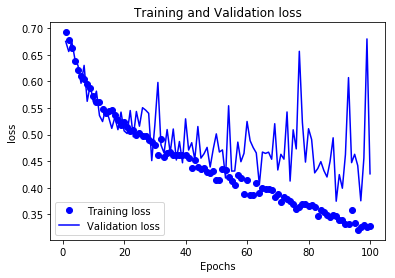

In [29]:
plt.plot(Epochs, acc, 'bo', label='Training acc')
plt.plot(Epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(Epochs, loss, 'bo', label='Training loss')
plt.plot(Epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()